# MULTICLASS CLASSIFICATION 



In [403]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score

In [404]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [405]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 28, 28)
(2000, 28, 28)
(8000,)
(2000,)


In [406]:
#print the unique values in Y_train
print(set(Y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


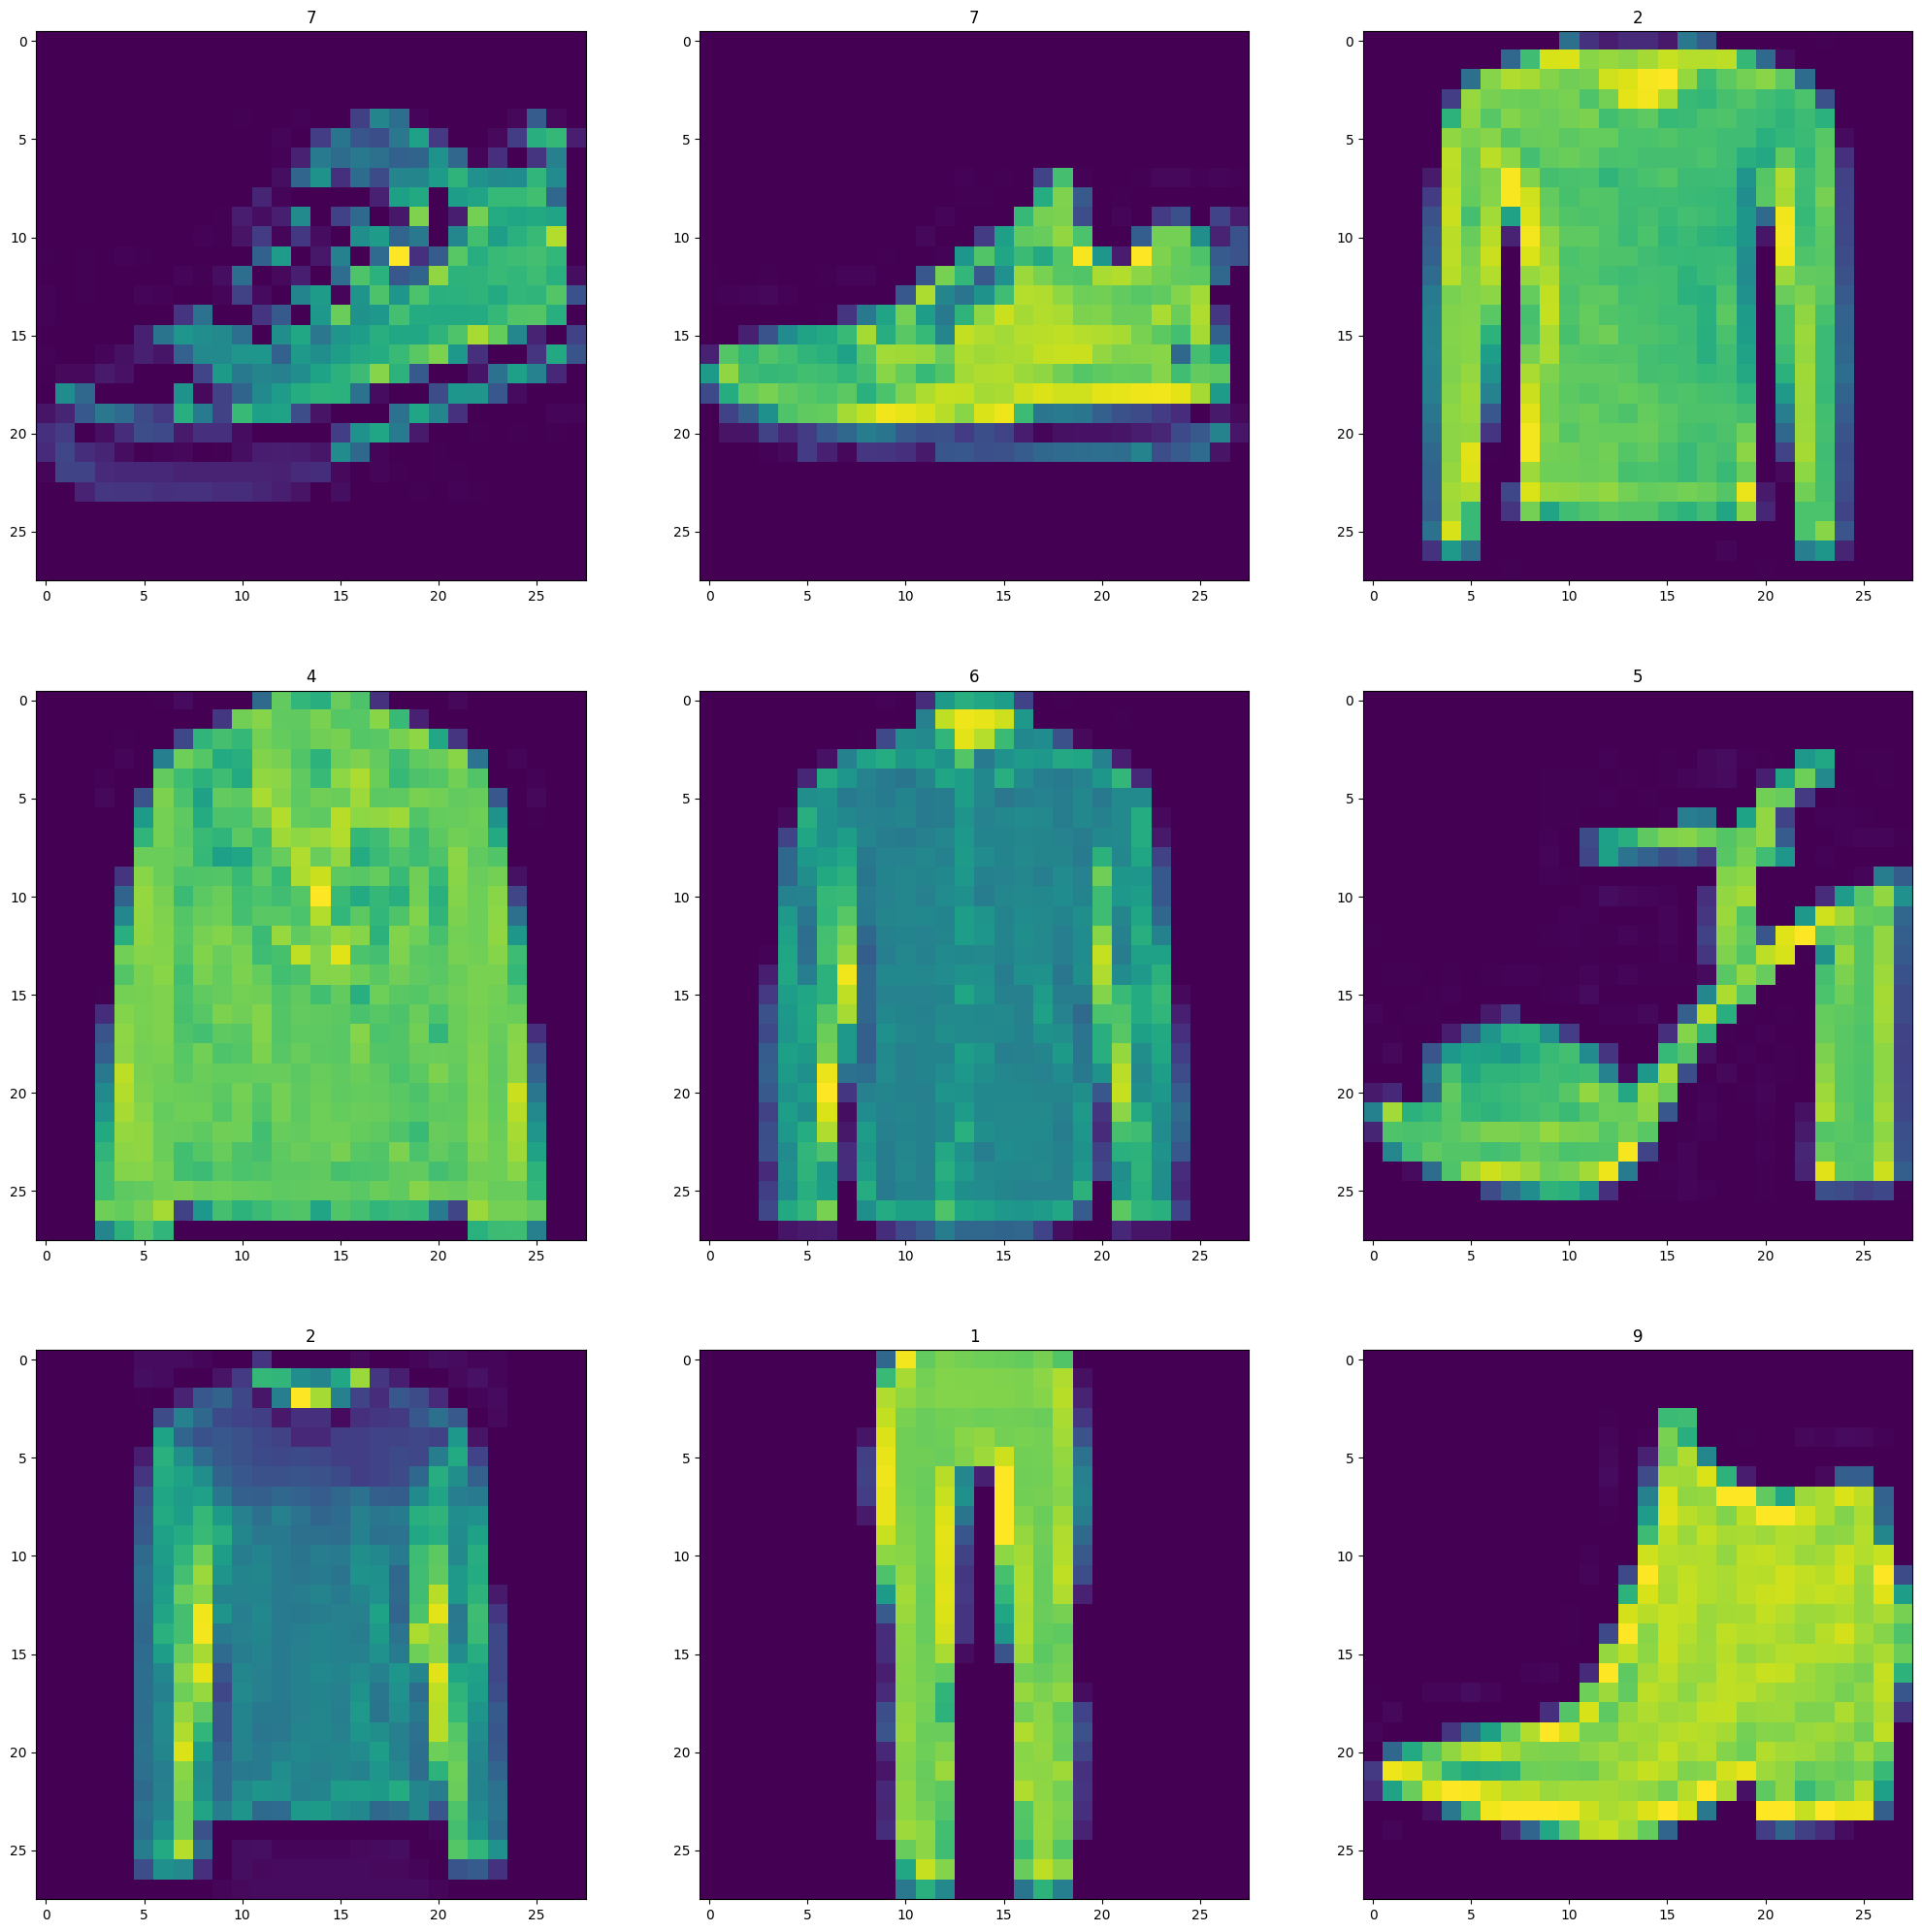

In [407]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
plt.show()
  #edit1__plot_image_here_
  #edit2__add_label_here_

###These number denotes the respective object
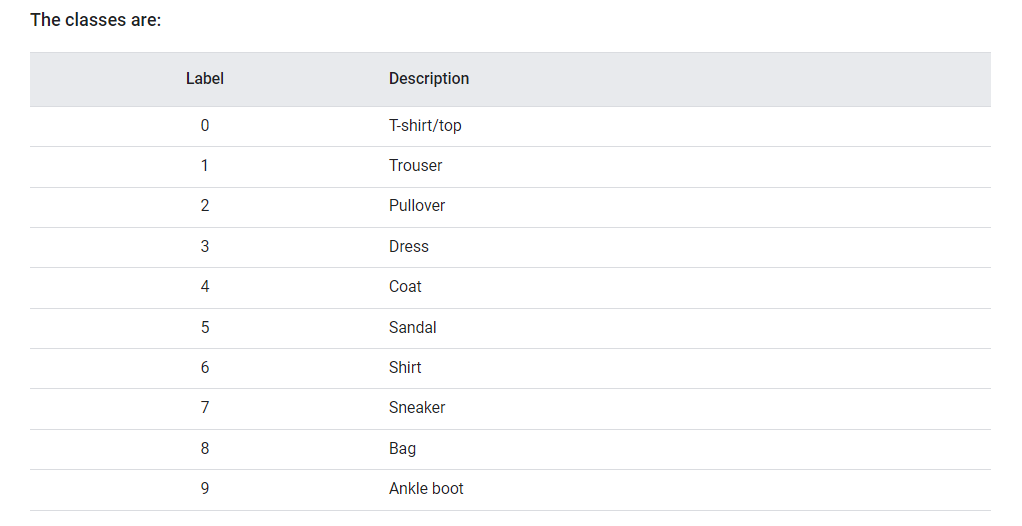

In [408]:
# Find the count of each type of class
d = {}
for i in range(0, len(Y_train)):
  if Y_train[i] not in d.keys():
    d[Y_train[i]] = 1
  else:
    d[Y_train[i]] += 1
print(d)

{3: 789, 2: 815, 8: 799, 7: 802, 4: 804, 1: 790, 6: 816, 0: 784, 5: 802, 9: 799}


In [409]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(84, activation = 'relu'))
model.add(tf.keras.layers.Dense(56, activation = 'relu'))
model.add(tf.keras.layers.Dense(36, activation = 'relu'))
model.add(tf.keras.layers.Dense(24, activation = 'relu'))
model.add(tf.keras.layers.Dense(24, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
#__output__layer with correct output shape and activation function[google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
#model.summary()

In [410]:
# Compiling the model
#add the lr and loss in the given space
lr = 0.0005
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = lr),
                  loss = "sparse_categorical_crossentropy"
                  ,metrics=['accuracy'])

In [411]:
#Lets analyse the model
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_152 (Dense)           (None, 128)               100480    
                                                                 
 dense_153 (Dense)           (None, 84)                10836     
                                                                 
 dense_154 (Dense)           (None, 56)                4760      
                                                                 
 dense_155 (Dense)           (None, 36)                2052      
                                                                 
 dense_156 (Dense)           (None, 24)                888       
                                                                 
 dense_157 (Dense)           (None, 24)              

###What is the number of trainable parameters in the model?

In [412]:
""" 
[objective] Write the answer here: 120,186

"""

' \n[objective] Write the answer here: 120,186\n\n'

In [413]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train, Y_train, validation_split=0.2, epochs = 23)

Epoch 1/23
200/200 [==============================] - 2s 5ms/step - loss: 2.3068 - accuracy: 0.2786 - val_loss: 1.6557 - val_accuracy: 0.4144
Epoch 2/23
200/200 [==============================] - 1s 4ms/step - loss: 1.4359 - accuracy: 0.5053 - val_loss: 1.3056 - val_accuracy: 0.5494
Epoch 3/23
200/200 [==============================] - 1s 5ms/step - loss: 1.1511 - accuracy: 0.6017 - val_loss: 1.1326 - val_accuracy: 0.6037
Epoch 4/23
200/200 [==============================] - 1s 6ms/step - loss: 1.0134 - accuracy: 0.6445 - val_loss: 0.9886 - val_accuracy: 0.6669
Epoch 5/23
200/200 [==============================] - 1s 6ms/step - loss: 0.9242 - accuracy: 0.6731 - val_loss: 0.9290 - val_accuracy: 0.6888
Epoch 6/23
200/200 [==============================] - 1s 4ms/step - loss: 0.8445 - accuracy: 0.7009 - val_loss: 0.8711 - val_accuracy: 0.7200
Epoch 7/23
200/200 [==============================] - 1s 4ms/step - loss: 0.7821 - accuracy: 0.7248 - val_loss: 0.8333 - val_accuracy: 0.7331
Epoch 

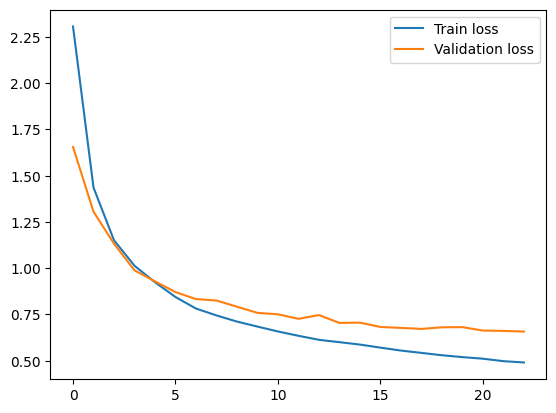

In [414]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

###What do you infer from the graph of losses above?

In [415]:
"""[Under 100 words] Write your answer here: The improvement in the prediction improves significantly in the starting, and the improvement gets slower towards the end as we reach the sweet spot with more epochs."""

'[Under 100 words] Write your answer here: The improvement in the prediction improves significantly in the starting, and the improvement gets slower towards the end as we reach the sweet spot with more epochs.'

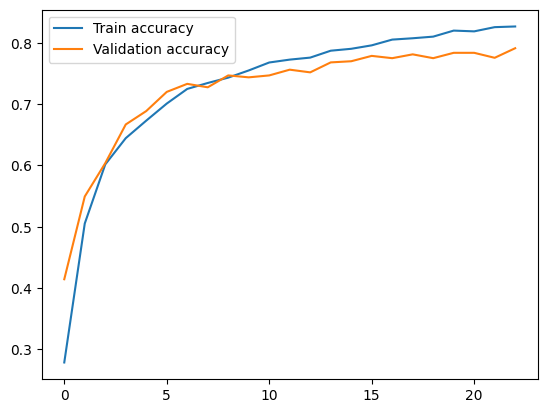

In [416]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [417]:
"""[Under 100 words] Write your answer here: The model gets more accurate with more tests. It is steeper in the starting, as the model improves more significantly in the starting."""

'[Under 100 words] Write your answer here: The model gets more accurate with more tests. It is steeper in the starting, as the model improves more significantly in the starting.'

In [418]:
#Checking the prediction

Y_predicted = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [419]:
# Calculate the R2score for the test data
Y_Pred = np.argmax(Y_predicted, axis = 1)
#print(Y_Pred.shape)
#print(Y_test.shape)
print(r2_score(Y_test, Y_Pred))
#unique, counts = np.unique(Y_Pred - Y_test, return_counts=True)

#dict(zip(unique, counts))[0]/20


0.6980607179782682


In [420]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [421]:
# print the shape of kernel of other layers as well
for i in range(1, 2):
  print(model.layers[i].kernel.shape)

(784, 128)


In [422]:
# Does that satisfied the matrix multiplication math discussed earlier

In [423]:
# Yes, it does.